### Team Aluminum 

importing revelant libraries 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



import warnings
warnings.filterwarnings("ignore")


In [2]:
!ls data


column_names.md   kc_house_data.csv


In [3]:
data = pd.read_csv('data/kc_house_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Do we need Id? no, chao

In [5]:
data = data.drop(columns='id', axis=1)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Ask the guys if they want to mess with dates!!!!

In [6]:
#  # overwrite date col
# data['date'] = pd.to_datetime(data['date'])

# # creating 2 more col might mess up data.. idk
# data['Month'] = data['date'].apply(lambda date: date.month)
# data['Year'] = data['date'].apply(lambda date: date.year)


Look at bathrooms ugh why floats?

In [7]:
data['bathrooms'][1] # whats that?

2.25

In [8]:
#df['bathrooms'] = np.round(df['bathrooms'])
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [9]:
data['price'].value_counts(ascending=False)


350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

In [10]:
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [11]:
# BathBedView = data.groupby(['bathrooms', 'bedrooms', 'view'])['price'].size()
# BathBedView

In [12]:
#BathBedView.plot(kind='barh', figsize=(20, 20))

In [34]:
# data['Year'].plot(kind='hist', figsize=(20, 12), bins=100);

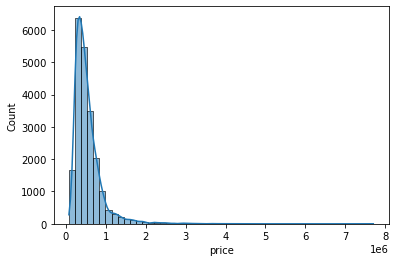

In [14]:
sns.histplot(data['price'],kde=True,bins=50);


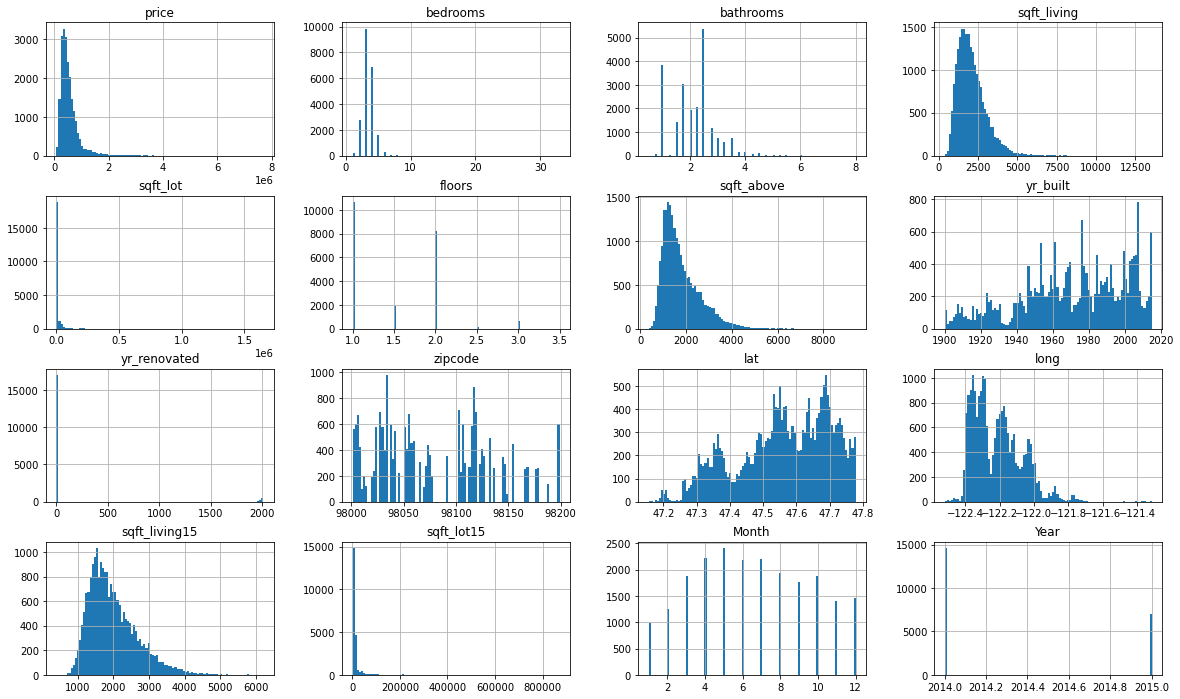

In [15]:
data.hist(bins=100, figsize=(20, 12));

- Look at = sqft_living15, sqft_above, sqft_living, price ofc ..... Maybe see long location = more $$ ?
- Also look at bedroom, 1 random 30...

<AxesSubplot:>

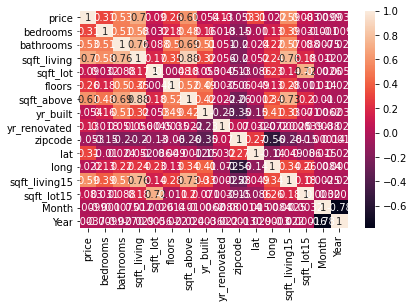

In [16]:
corr = data.corr()
sns.heatmap(corr, annot=True)

In [17]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.009928,0.003727
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.001046,-0.009949
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.007543,-0.026577
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,0.012112,-0.029014
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.002591,0.005628
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.014245,-0.022352
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.010153,-0.023782
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777,-0.006235,0.003574
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852,0.008769,-0.021990
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294,-0.000143,0.001290


## First Attempt to do 

Not trying to break the data set, creating new data set to experiment with only "price", "sqft_living15", "sqft_above", "sqft_living"

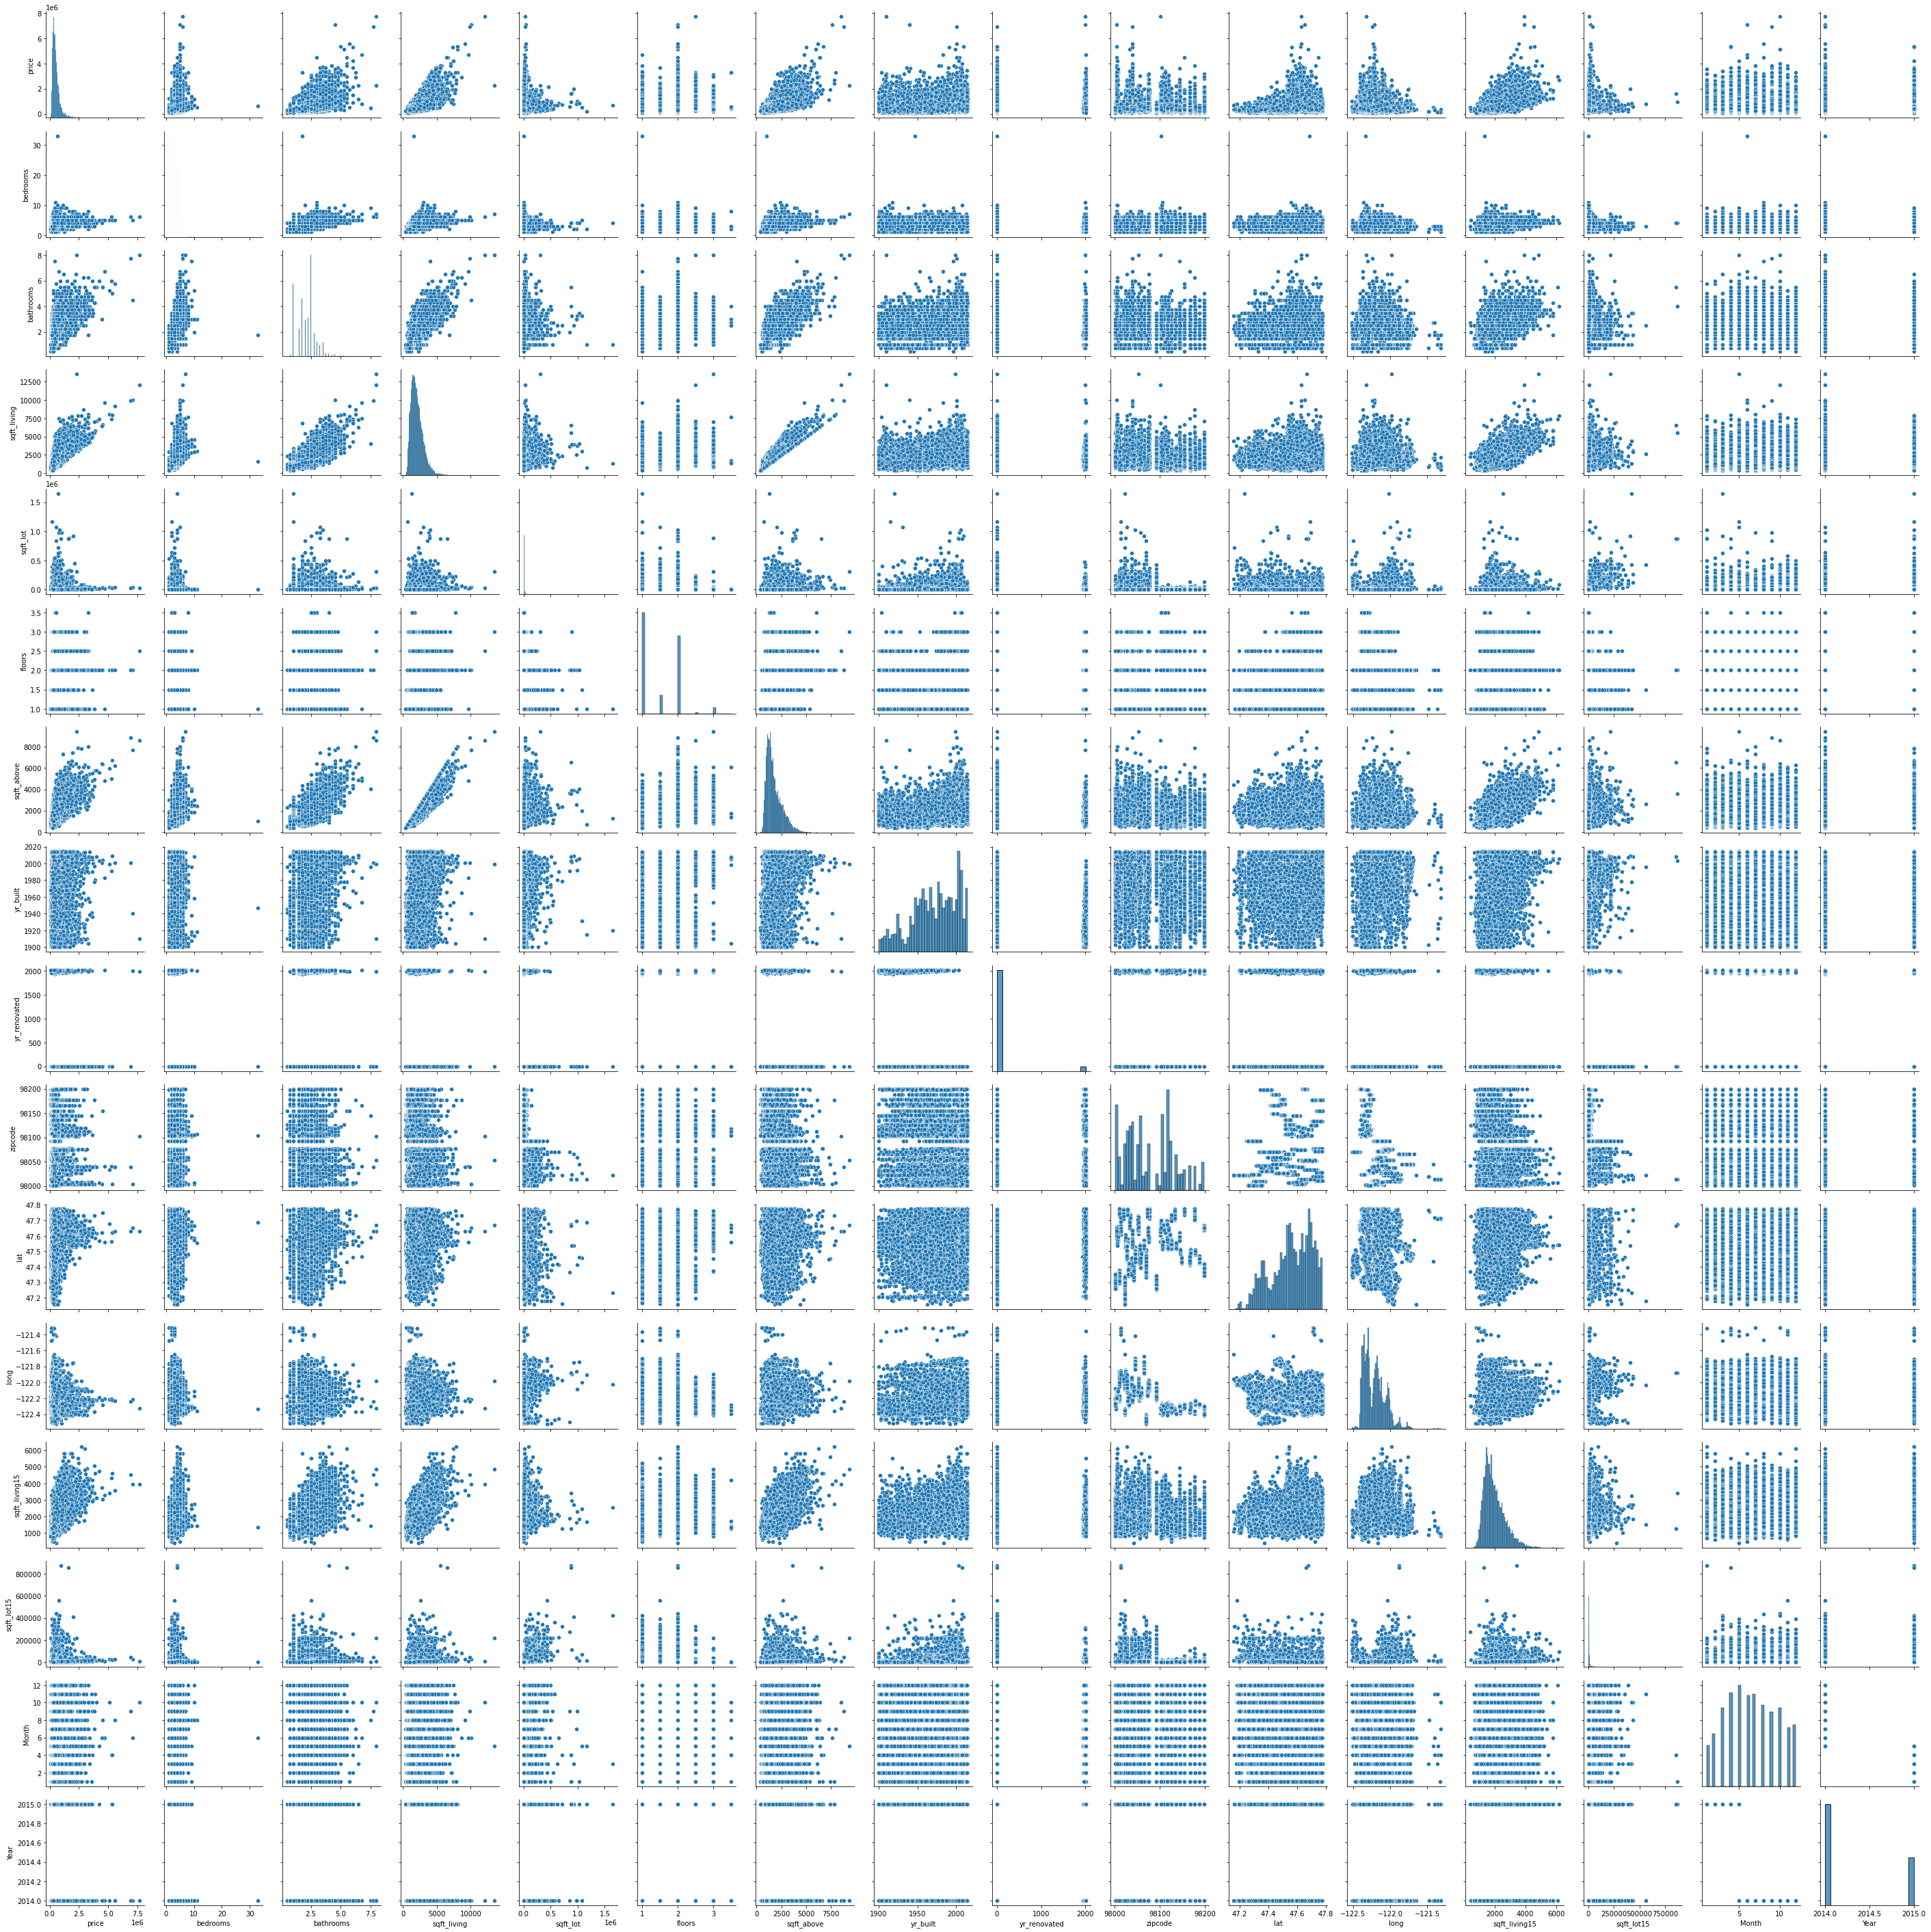

In [18]:
#data = pd.read_csv('data/kc_house_data.csv')
#data.head()
sns.pairplot(data)
plt.show()


In [19]:
data_1 = pd.read_csv('data/kc_house_data.csv', usecols=["price", "sqft_living15", "sqft_above", "sqft_living"])
data_1.head()


,price,sqft_living,sqft_above,sqft_living15
0,221900.0,1180,1180,1340
1,538000.0,2570,2170,1690
2,180000.0,770,770,2720
3,604000.0,1960,1050,1360
4,510000.0,1680,1680,1800


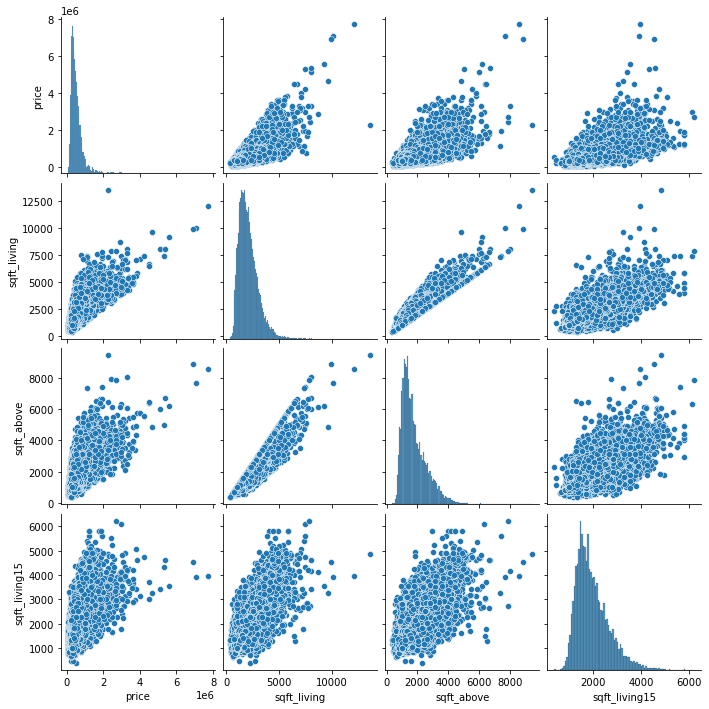

In [20]:
sns.pairplot(data_1)
plt.show()

In [21]:
data_1.corr()

,price,sqft_living,sqft_above,sqft_living15
price,1.000000,0.701917,0.605368,0.585241
sqft_living,0.701917,1.000000,0.876448,0.756402
sqft_above,0.605368,0.876448,1.000000,0.731767
sqft_living15,0.585241,0.756402,0.731767,1.000000


In [22]:
#price being my y, x being everything else except price
y = data_1['price']
X = data_1.drop(columns='price', axis=1)


# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


### Checking Each Assumption

using scatterplots - plotting the dependent variable against every independent variable
calculating correlations

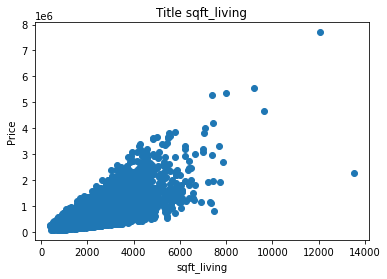

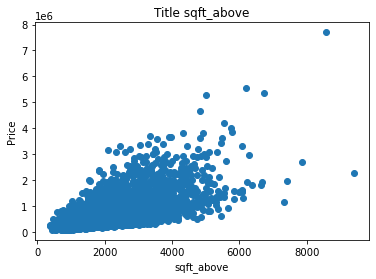

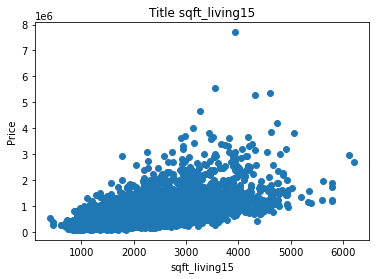

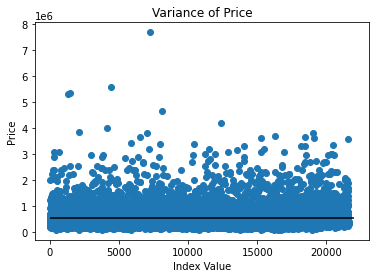

In [23]:
features = X_train.columns

for x in features:
    plt.scatter(X_train[x], y_train)
    plt.title(f'Title {x}')
    plt.xlabel(x)
    plt.ylabel('Price')
    plt.show()
    
# also plot sales against itself
plt.scatter(y_train.index, y_train)
plt.hlines(y_train.mean(), 0, 22000, colors= 'black' )
plt.xlabel('Index Value')
plt.ylabel('Price')
plt.title('Variance of Price')
plt.show()

In [24]:
# Make a train df so we can see X versus y in our train data
train_df = pd.concat([X_train, y_train], axis=1)

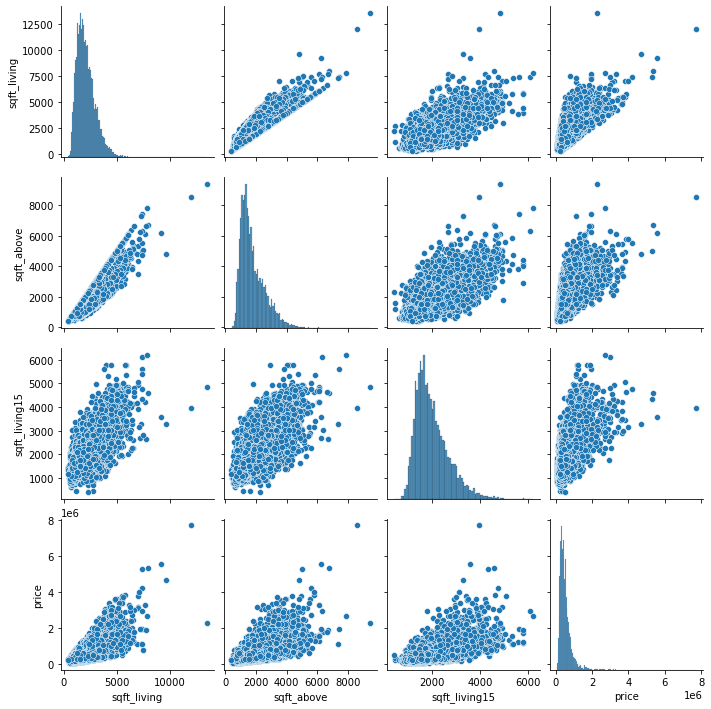

In [25]:
sns.pairplot(train_df)
plt.show()

In [26]:
# check correlations just against sales
train_df.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701469
sqft_above       0.601325
sqft_living15    0.591994
Name: price, dtype: float64

In [27]:
data_1.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
Name: price, dtype: float64

Not much change after train 

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

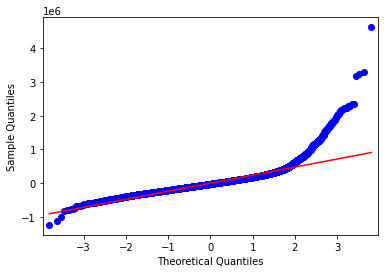

In [29]:
# QQ plots are generally great tools for checking for normality.


# Calculate our residuals
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds

sm.qqplot(train_residuals, line = 'r');

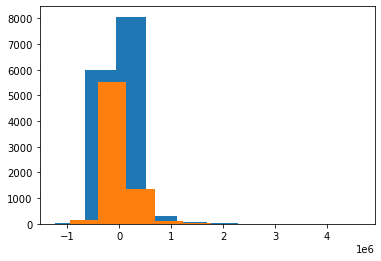

In [30]:
# Histogram of residuals
plt.hist(train_residuals, label='Train')
plt.hist(test_residuals, label='Test')

plt.show()

In [31]:
#ignore

# poly = PolynomialFeatures(4)
# X_fin = poly.fit_transform(X)

# reg_poly = LinearRegression().fit(X_fin, y)
# X_linspace = pd.DataFrame(np.linspace(50, 100, 50), columns=['price'])

# X_linspace_fin = poly.fit_transform(X_linspace)
# y_poly_pred = reg_poly.predict(X_linspace_fin)

# plt.scatter(X, y, color='green')
# plt.plot(X_linspace, y_poly_pred)
# plt.xlabel('xxx')
# plt.ylabel('yyy');

